In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [216]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [217]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [218]:
ds=df.drop(['PassengerId', 'Name','SibSp', 'Parch','Ticket','Cabin', 'Embarked'],axis=1)

In [219]:
ds.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [220]:
ds.Sex= ds.Sex.map({'male': 1, 'female': 0})

In [221]:
ds.Age.fillna(ds.Age.mean(), inplace= True)

In [222]:
x=ds.drop('Survived',axis=1)
y=ds['Survived']

In [223]:
print(x)

     Pclass  Sex        Age     Fare
0         3    1  22.000000   7.2500
1         1    0  38.000000  71.2833
2         3    0  26.000000   7.9250
3         1    0  35.000000  53.1000
4         3    1  35.000000   8.0500
..      ...  ...        ...      ...
886       2    1  27.000000  13.0000
887       1    0  19.000000  30.0000
888       3    0  29.699118  23.4500
889       1    1  26.000000  30.0000
890       3    1  32.000000   7.7500

[891 rows x 4 columns]


In [224]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [225]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [238]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [239]:
xtrain,xtest,ytrain,ytest

(     Pclass  Sex        Age     Fare
 93        3    1  26.000000  20.5750
 146       3    1  27.000000   7.7958
 367       3    0  29.699118   7.2292
 682       3    1  20.000000   9.2250
 760       3    1  29.699118  14.5000
 ..      ...  ...        ...      ...
 110       1    1  47.000000  52.0000
 731       3    1  11.000000  18.7875
 285       3    1  33.000000   8.6625
 414       3    1  44.000000   7.9250
 820       1    0  52.000000  93.5000
 
 [712 rows x 4 columns],
      Pclass  Sex        Age     Fare
 888       3    0  29.699118  23.4500
 345       2    0  24.000000  13.0000
 180       3    0  29.699118  69.5500
 300       3    0  29.699118   7.7500
 106       3    0  21.000000   7.6500
 ..      ...  ...        ...      ...
 26        3    1  29.699118   7.2250
 866       2    0  27.000000  13.8583
 4         3    1  35.000000   8.0500
 90        3    1  29.000000   8.0500
 56        2    0  21.000000  10.5000
 
 [179 rows x 4 columns],
 93     0
 146    1
 367    1
 682

In [240]:
nb=GaussianNB()

In [241]:
nb.fit(xtrain,ytrain)

GaussianNB()

In [246]:
nb.score(xtest,ytest)

0.770949720670391

In [243]:
ypredict=nb.predict(xtest)

In [244]:
con=confusion_matrix(ytest,ypredict)
con

array([[92, 23],
       [18, 46]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Data')

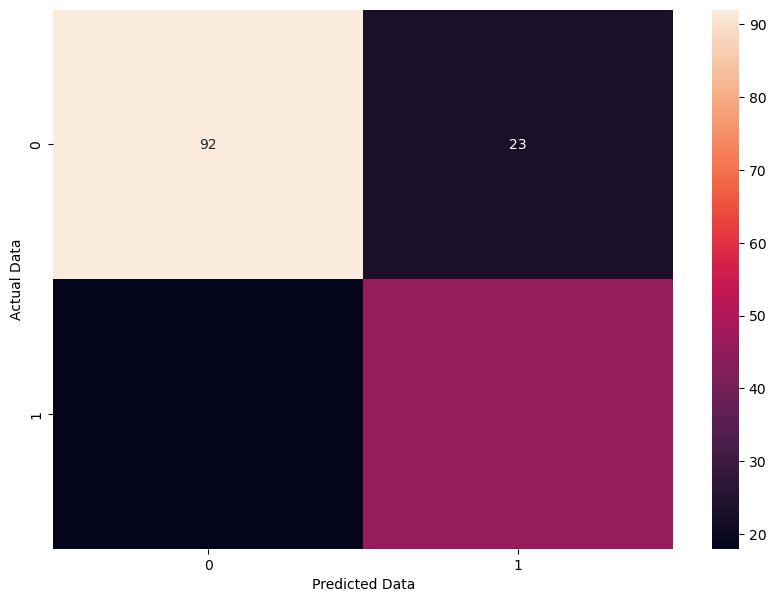

In [245]:
plt.figure(figsize=(10,7))
sb.heatmap(con, annot= True)
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')